In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('SELmartt.csv')

In [5]:
df.head()

,Month,Revenue
0,2022-01,266.0
1,2022-02,145.9
2,2022-03,183.1
3,2022-04,119.3
4,2022-05,180.3


In [7]:
df.describe()

,Revenue
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Month    36 non-null     object 
 1   Revenue  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [11]:
df.columns=['Month', 'Sales']

In [13]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [15]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.head()

,Sales
Month,
2022-01-01,266.0
2022-02-01,145.9
2022-03-01,183.1
2022-04-01,119.3
2022-05-01,180.3


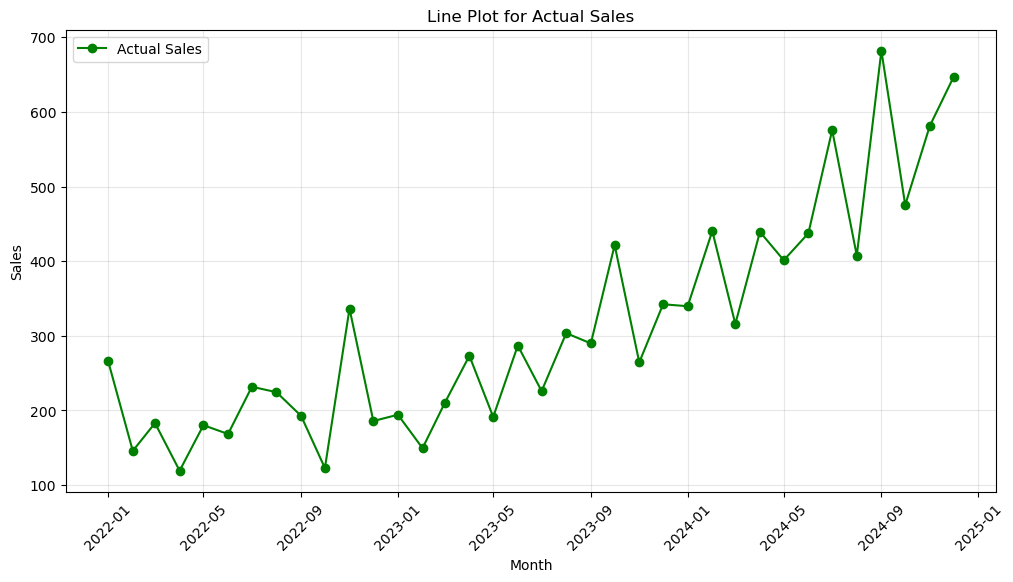

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Sales'],'o-',color='green',label='Actual Sales')
plt.title('Line Plot for Actual Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result=adfuller(df['Sales'])
output={
    'ADF Statsitic': result[0],
    'p-value': result[1],
    'Used Lags': result[2],
    'Number of observations': result[3]
        }
print(output)
if result[1]<=0.05:
    print('Stationary')
else:
    print('Not Stationary')

{'ADF Statsitic': 3.0601420836411806, 'p-value': 1.0, 'Used Lags': 10, 'Number of observations': 25}
Not Stationary


In [21]:
df['Sales First Difference']=df['Sales'].diff(1)
df['Seasonal First Difference']=df['Sales'].diff(12)

In [22]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
2022-01-01,266.0,NaN,NaN
2022-02-01,145.9,-120.1,NaN
2022-03-01,183.1,37.2,NaN
2022-04-01,119.3,-63.8,NaN
2022-05-01,180.3,61.0,NaN


In [27]:
df['Sales First Difference'].dropna()

Month
2022-02-01   -120.1
2022-03-01     37.2
2022-04-01    -63.8
2022-05-01     61.0
2022-06-01    -11.8
2022-07-01     63.3
2022-08-01     -7.3
2022-09-01    -31.7
2022-10-01    -69.9
2022-11-01    213.6
2022-12-01   -150.6
2023-01-01      8.4
2023-02-01    -44.8
2023-03-01     60.6
2023-04-01     63.2
2023-05-01    -81.9
2023-06-01     95.6
2023-07-01    -61.0
2023-08-01     77.6
2023-09-01    -13.7
2023-10-01    131.7
2023-11-01   -157.1
2023-12-01     77.8
2024-01-01     -2.6
2024-02-01    100.7
2024-03-01   -124.5
2024-04-01    123.4
2024-05-01    -38.0
2024-06-01     36.1
2024-07-01    138.1
2024-08-01   -167.9
2024-09-01    274.4
2024-10-01   -206.7
2024-11-01    106.0
2024-12-01     65.6
Name: Sales First Difference, dtype: float64

In [29]:
result=adfuller(df['Sales First Difference'].dropna())
output={
    'ADF Statsitic': result[0],
    'p-value': result[1],
    'Used Lags': result[2],
    'Number of observations': result[3]
        }
print(output)
if result[1]<=0.05:
    print('Stationary')
else:
    print('Not Stationary')

{'ADF Statsitic': -7.249074055553854, 'p-value': 1.7998574141687034e-10, 'Used Lags': 1, 'Number of observations': 33}
Stationary


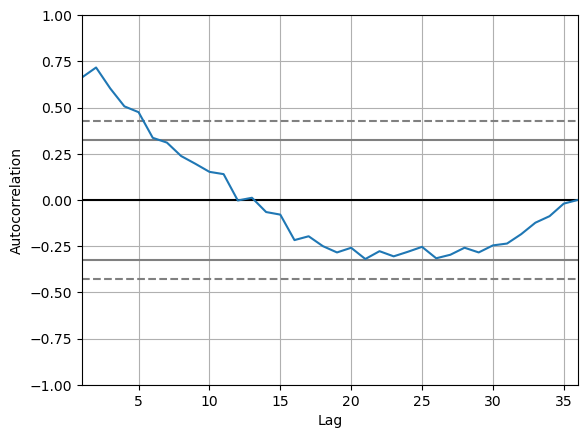

In [31]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [34]:
clean_data=df['Sales'].dropna()
auto_model=auto_arima(clean_data,
                 start_p=0,start_q=0,
                 max_p=5,max_q=5,
                 m=12,
                 seasonal=True,
                 d=None,
                 trace=True,
                 error_action='ignore',
                 suppress_warning=True,
                stepwise=True
                )
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=425.778, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=430.873, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=404.659, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=429.229, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=405.977, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=404.886, Time=0.26 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=402.858, Time=0.09 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=399.463, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=402.407, Time=

Model Summary:


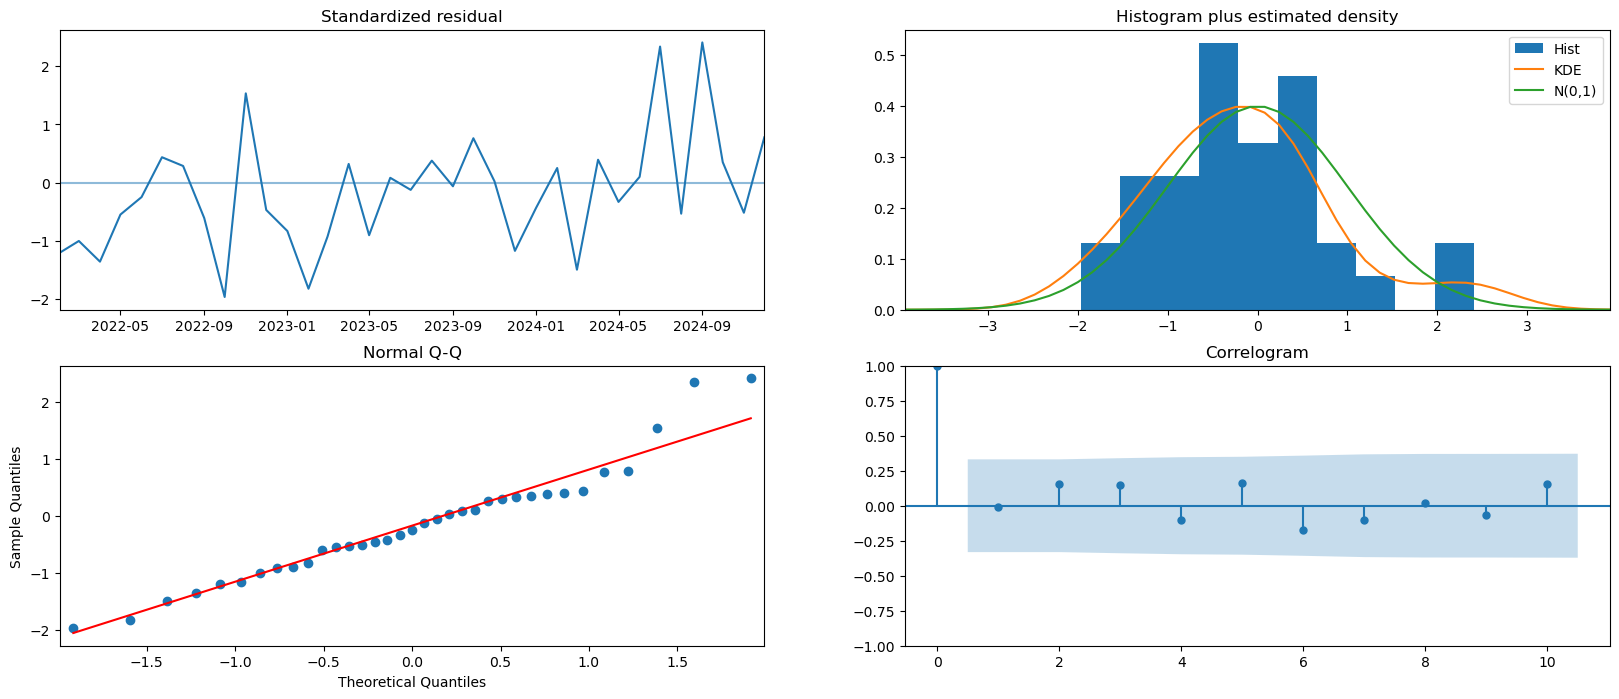

In [35]:
print('Model Summary:')
auto_model.plot_diagnostics(figsize=(20,8))
plt.show()

In [36]:
#Forecasting
forecast_steps=12
forecast,conf_int=auto_model.predict(n_periods=forecast_steps,
                             return_conf_int=True,
                             alpha=0.05
                             )

In [38]:
print('Forecast Values')
print(forecast)
print('Confidence Intervals:')
print(conf_int)

Forecast Values
2025-01-01    604.468062
2025-02-01    628.471945
2025-03-01    698.919025
2025-04-01    636.413900
2025-05-01    710.903407
2025-06-01    679.724938
2025-07-01    626.583062
2025-08-01    740.791162
2025-09-01    593.318231
2025-10-01    725.650385
2025-11-01    700.186218
2025-12-01    693.354399
Freq: MS, dtype: float64
Confidence Intervals:
[[492.6425817  716.29354302]
 [516.70510494 740.23878595]
 [572.66926517 825.16878507]
 [507.72231519 765.10548454]
 [575.06595181 846.74086253]
 [539.85540435 819.59447143]
 [481.39791598 771.7682071 ]
 [591.25598778 890.32633632]
 [439.12366767 747.51279445]
 [567.2217038  884.07906623]
 [537.41790322 862.9545321 ]
 [526.71121871 859.99757943]]


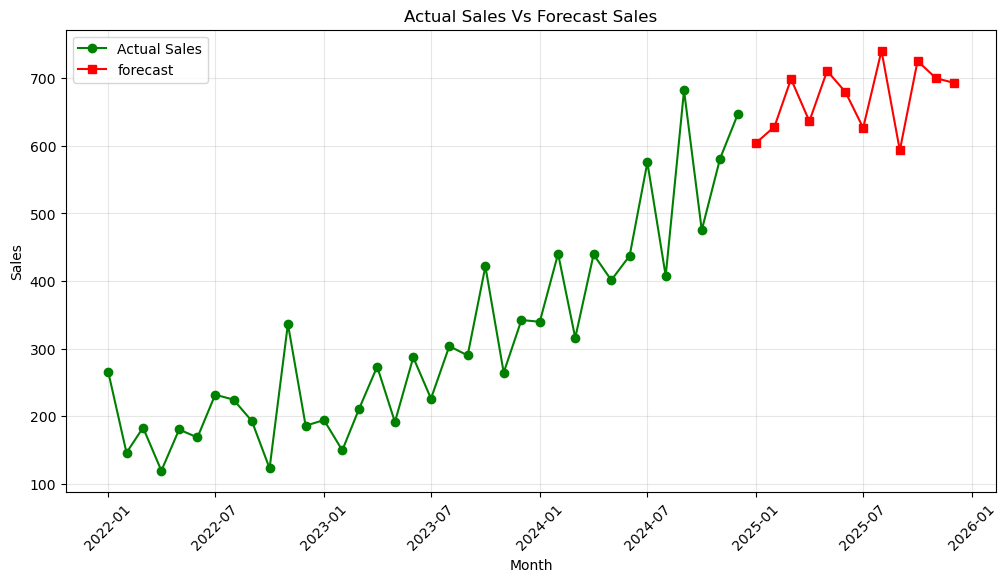

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Sales'],'o-',color='green',label='Actual Sales')
plt.plot(forecast,'s-',color='red',label='forecast')
plt.title('Actual Sales Vs Forecast Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()

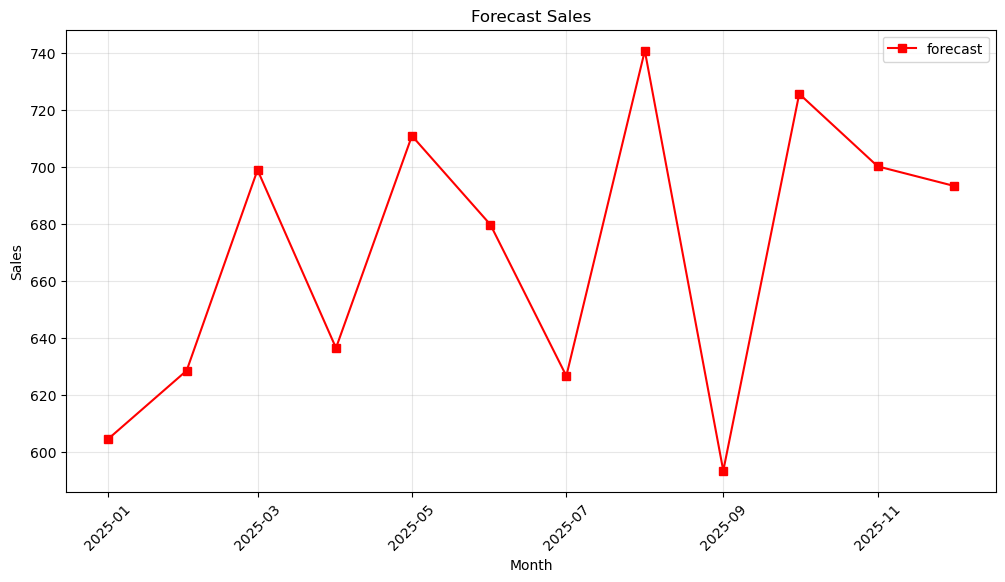

In [40]:
plt.figure(figsize=(12,6))
plt.plot(forecast,'s-',color='red',label='forecast')
plt.title('Forecast Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()

In [41]:
df['Forecast Values'] = forecast
df

,Sales,Sales First Difference,Seasonal First Difference,Forecast Values
Month,,,,
2022-01-01,266.0,NaN,NaN,NaN
2022-02-01,145.9,-120.1,NaN,NaN
2022-03-01,183.1,37.2,NaN,NaN
2022-04-01,119.3,-63.8,NaN,NaN
2022-05-01,180.3,61.0,NaN,NaN
2022-06-01,168.5,-11.8,NaN,NaN
2022-07-01,231.8,63.3,NaN,NaN
2022-08-01,224.5,-7.3,NaN,NaN
2022-09-01,192.8,-31.7,NaN,NaN


In [42]:
forecast

2025-01-01    604.468062
2025-02-01    628.471945
2025-03-01    698.919025
2025-04-01    636.413900
2025-05-01    710.903407
2025-06-01    679.724938
2025-07-01    626.583062
2025-08-01    740.791162
2025-09-01    593.318231
2025-10-01    725.650385
2025-11-01    700.186218
2025-12-01    693.354399
Freq: MS, dtype: float64

In [44]:
print('Model Evaluation')
print(F'AIC : {auto_model.aic():.3f}')
print(F'BIC : {auto_model.bic():.3f}')

Model Evaluation
AIC : 399.463
BIC : 407.240
